In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [26]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()
from sklearn.model_selection import train_test_split
X = df.drop('Purchased', axis=1,inplace=False)
Y = df['Purchased']
print(X.head())
print(Y.head())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000
0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


((280, 2), (120, 2), (280,), (120,))

# Standard Scaler

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# transform funcion will return numpy array, so need to convert it into dataframe
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)
print(X_train_scaled.head())
print(X_test_scaled.head())

        Age  EstimatedSalary
0 -1.163172        -1.584970
1  2.170181         0.930987
2  0.013305         1.220177
3  0.209385         1.075582
4  0.405465        -0.486047
        Age  EstimatedSalary
0 -0.771013         0.497201
1  0.013305        -0.572804
2 -0.280814         0.150172
3 -0.771013         0.265849
4 -0.280814        -0.572804


In [29]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [36]:
# look at the effect of scaler 
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [37]:

np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Now look at the effect of scaling with plotting

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='EstimatedSalary'>

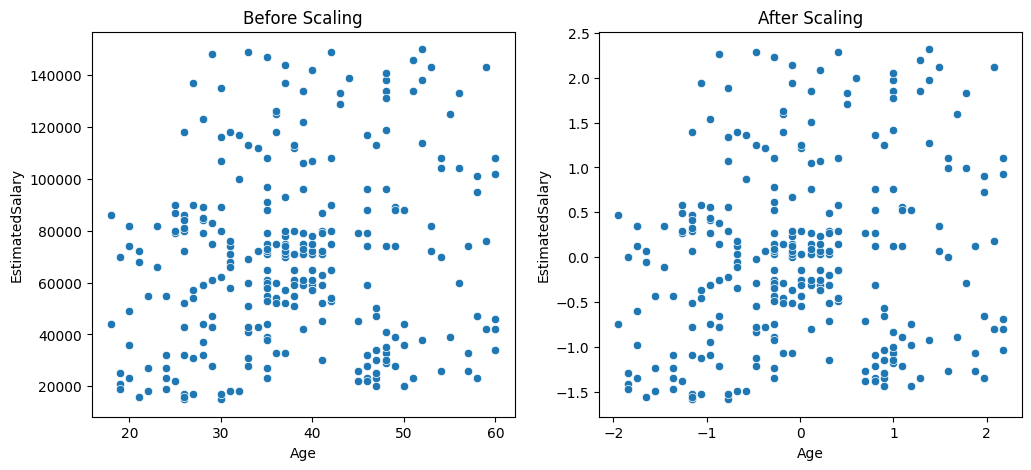

In [ ]:
# No effect in scatter plot as it is linear transformation
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax1.set_title('Before Scaling')
sns.scatterplot(data=X_train,x='Age', y='EstimatedSalary', ax=ax1)
ax2.set_title('After Scaling')
sns.scatterplot(data=X_train_scaled, x='Age', y='EstimatedSalary', ax=ax2)

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

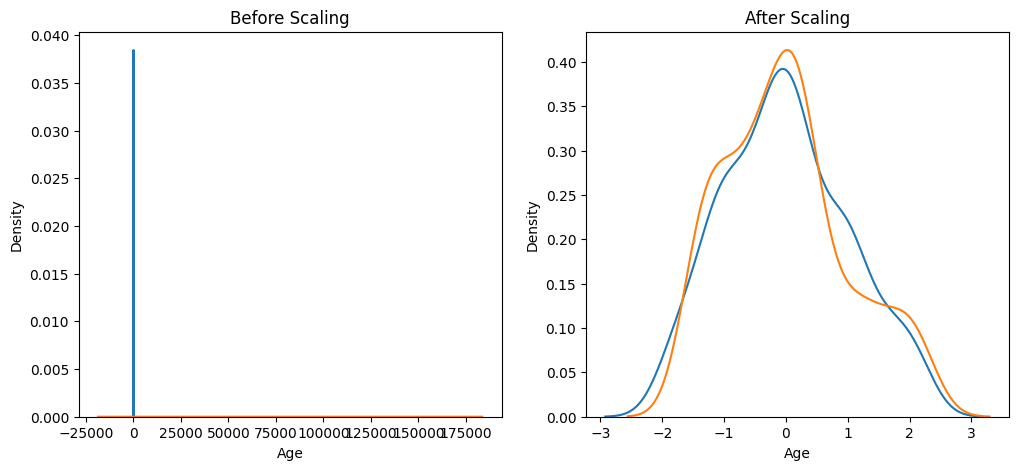

In [ ]:
# Now look at the effect with kde plot 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
ax2.set_title('After Scaling')  
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)